<a href="https://colab.research.google.com/github/syuan0525/image_process/blob/main/light_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

In [4]:
def picture_resize(picture,weight):
  w = weight
  h = int(picture.shape[0]/(picture.shape[1]/w))
  picture2 = cv2.resize(picture, (w,h))
  return picture2

def light_detect(picture):
  pic1 = cv2.imread(picture,1)
  pic1 = picture_resize(pic1, 500) 
  pic2 = cv2.inRange(pic1, (240,240,240),(255,255,255))
  # pic2 = cv2.dilate(pic2, np.ones((5,5)))
  pic2 = cv2.morphologyEx(pic2, cv2.MORPH_CLOSE, np.ones((2,2)))

  # cv2_imshow(pic1)
  # cv2_imshow(pic2)
  # 取得輪廓
  # 輪廓點, 輪廓階層資料=cv2.findContours(圖像變數(灰階圖像),類型,方法) 黑白圖為主
  scr , date = cv2.findContours(pic2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
  # 繪製輪廓
  # cv2.drawContours(圖像變數,存取全部輪廓的變數,要繪製的輪廓索引,顏色,粗細)
  # cv2.drawContours(pic1, scr, -1, (0,0,255),2)  # -1:代表全部
  # print("輪廓數量: ",len(scr))
  # 取得包覆指定輪廓點的最小正矩形
  bright = 0
  for i in range(0,len(scr),1):
    (x, y), radius = cv2.minEnclosingCircle(scr[i])
    center = (int(x), int(y))
    radius = int(radius)
    area = cv2.contourArea(scr[i])  # 輪廓面積
    # print("大小: ", area)
    if not area < 10:
      cv2.circle(pic1, center, radius, (0, 0, 255), 1)
      bright += 1

  # for i in range(0,len(scr),1):
  #   x, y, w, h = cv2.boundingRect(scr[i])
  #   area = w * h  
  #   if not area < 20:
  #   # X座標, Y座標, 寬度, 高度 =cv2.boundingRect(指定的輪廓)
  #     cv2.rectangle(pic1, (x,y), (x+w,y+h),(0,0,255), 2)
  #     bright += 1
  cv2_imshow(pic1)
  print("亮燈數量: ",bright)

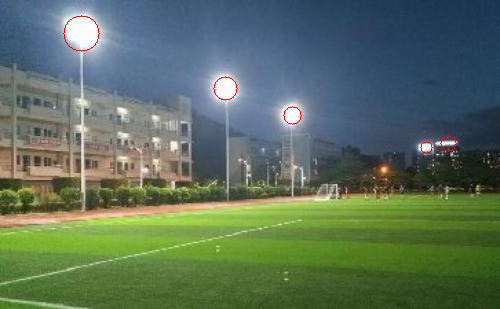

亮燈數量:  5


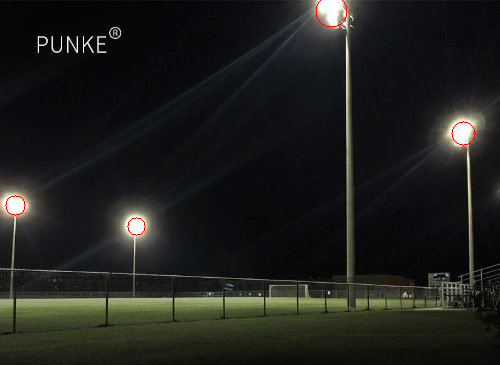

亮燈數量:  4


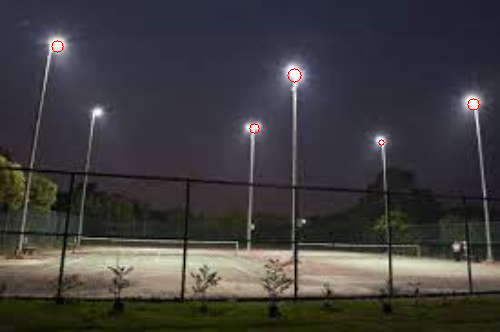

亮燈數量:  5


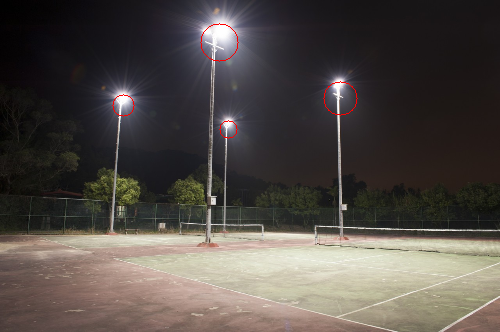

亮燈數量:  4


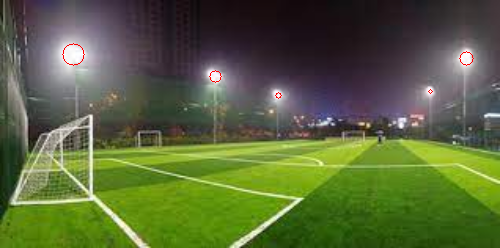

亮燈數量:  5


In [5]:
for i in range(5):
  path = f"p{i+1}.jpg"
  light_detect(path)